<a href="https://colab.research.google.com/github/SBilaal/Cards/blob/master/Grain_Eating_Birds_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = '/content/gdrive/MyDrive/Birds_Test_Dataset'
train_path = f'{data}/train'
valid_path = f'{data}/valid'
test_path = f'{data}/test'
classes = ['AFRICAN FIREFINCH', 'CROWNED PIGEON', 'GREEN JAY', 'MOURNING DOVE', 'NICOBAR PIGEON', 'PURPLE FINCH', 'RED BROWED FINCH', 'ROCK DOVE', 'STRAWBERRY FINCH', 'YELLOW HEADED BLACKBIRD']
print(train_path)

os.path.isdir(train_path)
os.path.isdir(test_path)
os.path.isdir(valid_path)

/content/gdrive/MyDrive/Birds_Test_Dataset/train


True

In [59]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=classes, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=classes, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=classes, batch_size=10, shuffle=False)

Found 950 images belonging to 10 classes.
Found 230 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [60]:
imgs, labels = next(train_batches)

In [61]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

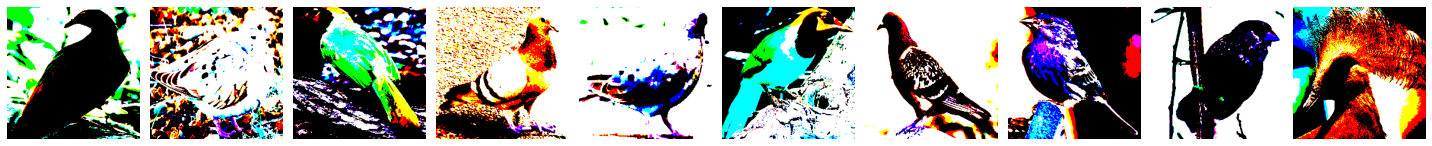

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [62]:
plotImages(imgs)
print(labels)

In [8]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
                    MaxPool2D(pool_size=(2,2),strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPool2D(pool_size=(2,2),strides=2),
                    Flatten(),
                    Dense(units=10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                1003530   
Total params: 1,013,674
Trainable params: 1,013,674
Non-trainable params: 0
______________________________________________

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
95/95 - 291s - loss: 23.9737 - accuracy: 0.3611 - val_loss: 9.4232 - val_accuracy: 0.4522
Epoch 2/10
95/95 - 55s - loss: 2.4717 - accuracy: 0.7253 - val_loss: 4.7887 - val_accuracy: 0.5783
Epoch 3/10
95/95 - 56s - loss: 0.4868 - accuracy: 0.9074 - val_loss: 3.6015 - val_accuracy: 0.6087
Epoch 4/10
95/95 - 56s - loss: 0.1707 - accuracy: 0.9621 - val_loss: 2.6226 - val_accuracy: 0.6826
Epoch 5/10
95/95 - 55s - loss: 0.0102 - accuracy: 0.9968 - val_loss: 2.7043 - val_accuracy: 0.6957
Epoch 6/10
95/95 - 56s - loss: 0.0040 - accuracy: 0.9979 - val_loss: 2.5073 - val_accuracy: 0.6870
Epoch 7/10
95/95 - 55s - loss: 0.0041 - accuracy: 0.9989 - val_loss: 2.3839 - val_accuracy: 0.7130
Epoch 8/10
95/95 - 56s - loss: 1.5280e-04 - accuracy: 1.0000 - val_loss: 2.3829 - val_accuracy: 0.7174
Epoch 9/10
95/95 - 57s - loss: 8.5895e-05 - accuracy: 1.0000 - val_loss: 2.3801 - val_accuracy: 0.7130
Epoch 10/10
95/95 - 55s - loss: 7.2830e-05 - accuracy: 1.0000 - val_loss: 2.3804 - val_accuracy: 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

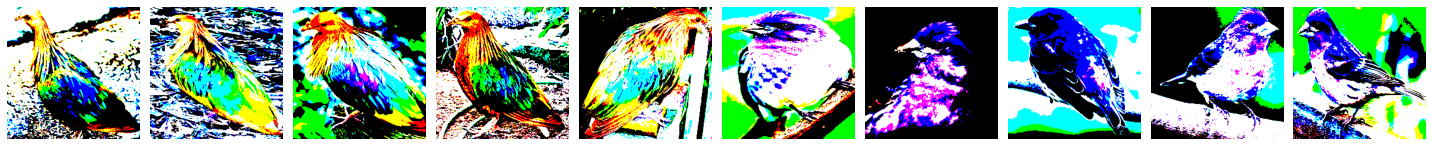

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [14]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [15]:
test_batches.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int32)

In [16]:
predictions = model.predict(x=test_batches, verbose=2)

5/5 - 6s


In [17]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 

In [26]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [53]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-72)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
print(test_batches.class_indices)
print(classes)

{'AFRICAN FIREFINCH': 0, 'CROWNED PIGEON': 1, 'GREEN JAY': 2, 'MOURNING DOVE': 3, 'NICOBAR PIGEON': 4, 'PURPLE FINCH': 5, 'RED BROWED FINCH': 6, 'ROCK DOVE': 7, 'STRAWBERRY FINCH': 8, 'YELLOW HEADED BLACKBIRD': 9}
['AFRICAN FIREFINCH', 'CROWNED PIGEON', 'GREEN JAY', 'MOURNING DOVE', 'NICOBAR PIGEON', 'PURPLE FINCH', 'RED BROWED FINCH', 'ROCK DOVE', 'STRAWBERRY FINCH', 'YELLOW HEADED BLACKBIRD']


Normalized confusion matrix
[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.  0.  0.  0.  0.4 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0.  0.  0.  0. ]
 [0.2 0.  0.  0.6 0.  0.2 0.  0.  0.  0. ]
 [0.  0.  0.4 0.  0.4 0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.  0.6 0.2 0.  0.2 0. ]
 [0.  0.  0.  0.  0.  0.4 0.6 0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.  0.  0.8 0.  0. ]
 [0.  0.  0.  0.  0.  0.2 0.2 0.  0.6 0. ]
 [0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.8]]


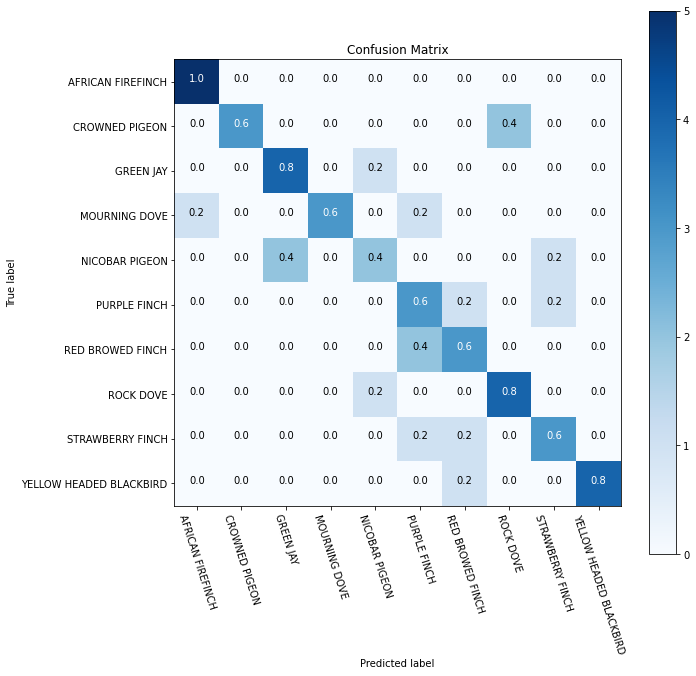

In [54]:
cm_plot_labels = classes
plot_confusion_matrix(cm=cm, classes=classes, normalize=True, title='Confusion Matrix')